# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [65]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [67]:
# Dropping the rows with string values in sellingprice and mmr
df.drop( df[df['trim'] == 'SE PZEV w/Connectivity'].index, axis = 0, inplace = True)

In [68]:
df['sellingprice'] = df['sellingprice'].astype('int')
df['mmr'] = df['mmr'].astype('int')

**Converting sellingpricec and mmr to integer**

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [70]:
makes = df['make'].unique().tolist()
makes = [str(s).lower() for s in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

In [71]:
df['make'] = df['make'].apply(lambda x: x.lower() if type(x) == str else x)

In [72]:
df['make'].nunique()

66

**After conversion there are only66 unique makes**

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [104]:
df.corr()

,year,odometer,mmr,sellingprice
year,1.000000,-0.772720,0.596623,0.586488
odometer,-0.772720,1.000000,-0.588107,-0.582405
mmr,0.596623,-0.588107,1.000000,0.983634
sellingprice,0.586488,-0.582405,0.983634,1.000000


**Overall correlation is 0.983634**

In [105]:
# Getting coorelation for each window
row = []
for i in range(10000, 230000, 10000):
    corr = df[ df['sellingprice'] < i+1].corr()['sellingprice']['mmr']
    
    row.append([i, corr])

In [106]:
data = pd.DataFrame(row, columns=['sell price', 'corr'])

**Create a scatter plot with the relationship.**

<AxesSubplot:xlabel='sellingprice', ylabel='mmr'>

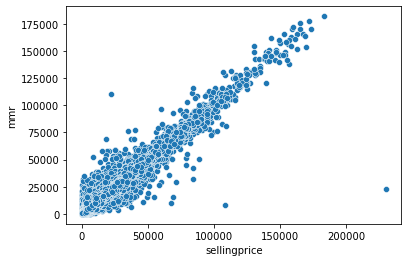

In [107]:
sns.scatterplot(data = df, x = 'sellingprice', y = 'mmr')

<AxesSubplot:xlabel='corr', ylabel='sell price'>

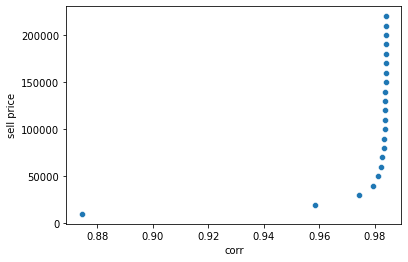

In [83]:
sns.scatterplot(data = data, x = 'corr', y = 'sell price')

**Correlation is increasing as the window is increasing**

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [95]:
data = df[ df['year'].between(2010, 2015)]

In [96]:
data['make'].value_counts()

ford             70565
nissan           42374
chevrolet        38161
toyota           26263
dodge            20169
hyundai          17899
honda            15644
kia              15347
infiniti         12720
bmw              11905
chrysler         10912
mercedes-benz    10149
jeep              9007
volkswagen        7974
lexus             7178
mazda             5967
gmc               5586
ram               4574
lincoln           3793
subaru            3702
audi              3219
cadillac          3029
acura             2920
buick             2490
mitsubishi        2391
mini              2204
volvo             1690
land rover        1204
scion             1070
fiat               865
porsche            807
jaguar             624
smart              310
suzuki             291
mercury            193
pontiac             72
maserati            57
bentley             30
saab                23
tesla               23
vw                  19
rolls-royce         17
ferrari             14
fisker     

In [97]:
top_makes = data.groupby(['make']).count()['year'].sort_values(ascending = False)[:10].index.values

In [98]:
data = data[ data['make'].isin(top_makes)]

<AxesSubplot:xlabel='make', ylabel='sellingprice'>

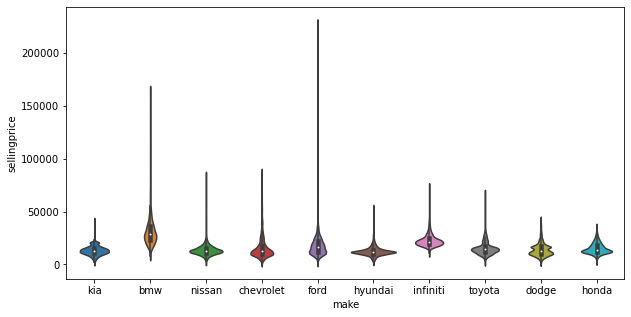

In [103]:
plt.figure(figsize = (10, 5))
sns.violinplot(data = data, x = 'make', y = 'sellingprice')